# ✂️ TP 2 : Méthodes de Discrétisation

**Contexte :**
La plupart des algorithmes de règles d'association (comme **Apriori** ou **FP-Growth** que nous verrons au TP 3) ne fonctionnent pas avec des données numériques continues (ex: alcool = 10.5, 10.6, 10.7...). Ils ont besoin de données catégorielles (ex: alcool = "Faible", "Moyen", "Fort").

**Objectif :**
Transformer nos variables continues (chimiques) en intervalles discrets. Nous allons préparer le dataset pour le TP suivant.

**Méthodes abordées :**
1.  **Equal Width Binning** (Largeur égale)
2.  **Equal Frequency Binning** (Fréquence égale / Quantiles)
3.  **Discrétisation de la cible (Quality)**

## Importation et configuration.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration esthétique
sns.set_style("whitegrid")

# Désactiver les avertissements de copie pandas pour plus de clarté
pd.options.mode.chained_assignment = None 

print("Librairies chargées.")

Librairies chargées.


## Chargement des données.

In [4]:
# Chargement du dataset Vin Blanc
# Le séparateur est un point-virgule pour ce fichier
try:
    df = pd.read_csv('../wine+quality/winequality-red.csv', sep=';')
    print("Dataset chargé avec succès !")
    print(f"Dimensions : {df.shape}")
except FileNotFoundError:
    print("❌ Erreur : Fichier introuvable. Vérifiez que vous êtes dans le dossier 'Discretisation' et que 'Datasets' est au niveau supérieur.")

df.head()

Dataset chargé avec succès !
Dimensions : (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 1. Méthode "Equal Width" (Largeur Égale)

Cette méthode divise l'étendue des données (Max - Min) en $k$ intervalles de même taille.

* **Avantage :** Simple à comprendre.
* **Inconvénient :** Sensible aux valeurs extrêmes (outliers). Si on a une valeur très loin, les intervalles seront vides.

Testons cela sur la colonne **`alcohol`**.

/tmp/ipykernel_11434/449442216.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='alcohol_cat', data=df_width, palette='Blues')


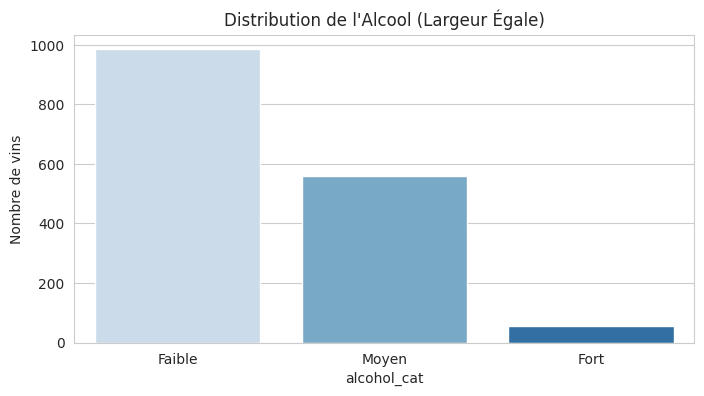

Intervalles générés :
alcohol_cat
Faible    985
Moyen     559
Fort       55
Name: count, dtype: int64


In [5]:
# On crée une copie pour ne pas toucher aux données brutes tout de suite
df_width = df.copy()

# Discrétisation en 3 intervalles (Faible, Moyen, Fort)
# pd.cut gère la largeur égale
df_width['alcohol_cat'] = pd.cut(df_width['alcohol'], bins=3, labels=["Faible", "Moyen", "Fort"])

# Visualisation
plt.figure(figsize=(8, 4))
sns.countplot(x='alcohol_cat', data=df_width, palette='Blues')
plt.title('Distribution de l\'Alcool (Largeur Égale)')
plt.ylabel('Nombre de vins')
plt.show()

print("Intervalles générés :")
print(df_width['alcohol_cat'].value_counts().sort_index())

## 2. Méthode "Equal Frequency" (Fréquence Égale / Quantiles)

Cette méthode essaie de mettre approximativement le **même nombre d'observations** dans chaque intervalle. Elle utilise les quantiles (ex: les 33% les plus faibles, les 33% du milieu, etc.).

* **Avantage :** Gère bien les données biaisées (skewed).
* **Inconvénient :** Les intervalles peuvent avoir des tailles très inégales (ex: un intervalle très court si beaucoup de données sont concentrées).

Testons cela sur la même colonne **`alcohol`** pour comparer.

/tmp/ipykernel_11434/1065266483.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='alcohol_cat', data=df_freq, palette='Greens')


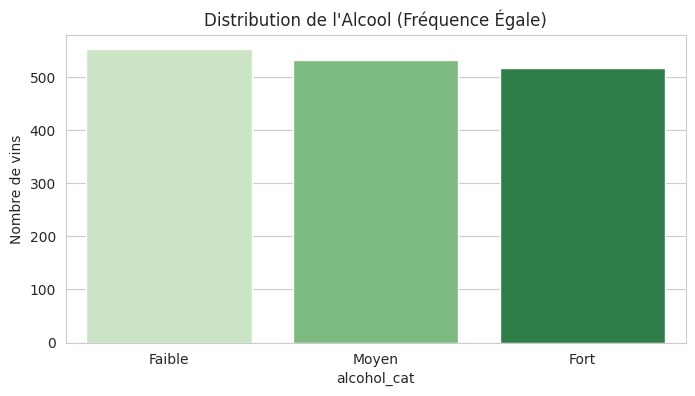

Intervalles générés (Remarquez l'équilibre des classes) :
alcohol_cat
Faible    552
Moyen     531
Fort      516
Name: count, dtype: int64


In [6]:
# On utilise une copie
df_freq = df.copy()

# Discrétisation par quantiles (q=3 pour 3 catégories)
# pd.qcut gère la fréquence égale
df_freq['alcohol_cat'] = pd.qcut(df_freq['alcohol'], q=3, labels=["Faible", "Moyen", "Fort"])

# Visualisation
plt.figure(figsize=(8, 4))
sns.countplot(x='alcohol_cat', data=df_freq, palette='Greens')
plt.title('Distribution de l\'Alcool (Fréquence Égale)')
plt.ylabel('Nombre de vins')
plt.show()

print("Intervalles générés (Remarquez l'équilibre des classes) :")
print(df_freq['alcohol_cat'].value_counts().sort_index())

## 3. Préparation Globale du Dataset pour le TP 3 (Apriori)

Pour utiliser l'algorithme Apriori au prochain TP, nous devons :
1. Discrétiser **Toutes** les colonnes numériques.
2. Transformer la colonne cible `quality` en classes logiques (ex: Mauvais, Moyen, Bon).

Nous allons utiliser la méthode **Equal Frequency (pd.qcut)** pour les variables chimiques car elle est plus robuste pour le Data Mining.

**Règle de transformation pour la Qualité :**
* Note <= 5 : **"Low"**
* Note 6 : **"Medium"**
* Note >= 7 : **"High"**

In [7]:
# Copie finale
df_final = df.copy()

# 1. Discrétisation de la variable cible 'quality' (Manuelle car spécifique)
def categorize_quality(score):
    if score <= 5:
        return 'Qualité_Basse'
    elif score == 6:
        return 'Qualité_Moyenne'
    else:
        return 'Qualité_Haute'

df_final['quality_cat'] = df_final['quality'].apply(categorize_quality)

# 2. Discrétisation automatique des autres colonnes (sauf quality qu'on vient de traiter)
features = df_final.columns.drop(['quality', 'quality_cat'])

for col in features:
    # On ajoute le suffixe '_cat' pour distinguer
    # On utilise qcut avec 3 bins (Low, Medium, High)
    # Note : 'duplicates=drop' gère les cas où plusieurs seuils sont identiques
    try:
        new_col_name = col
        df_final[new_col_name] = pd.qcut(df_final[col], q=3, labels=["Faible", "Moyen", "Fort"])
        
        # Pour rendre les résultats plus lisibles plus tard, on ajoute le nom de la colonne à la valeur
        # Ex: Au lieu de "Faible", on aura "Alcool_Faible"
        df_final[new_col_name] = df_final[new_col_name].astype(str).apply(lambda x: f"{col}_{x}")
        
    except ValueError:
        # Fallback sur cut si qcut échoue (cas rares de valeurs uniques)
        df_final[new_col_name] = pd.cut(df_final[col], bins=3, labels=["Faible", "Moyen", "Fort"])
        df_final[new_col_name] = df_final[new_col_name].astype(str).apply(lambda x: f"{col}_{x}")

# On ne garde que les colonnes transformées (catégorielles) pour Apriori
cols_to_keep = [col for col in df_final.columns if df_final[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df_final[col])]
df_apriori = df_final[cols_to_keep]

# Suppression de l'ancienne colonne quality numérique si elle traine
if 'quality' in df_apriori.columns:
    df_apriori = df_apriori.drop('quality', axis=1)

print("Aperçu du dataset transformé pour Apriori :")
df_apriori.head()

Aperçu du dataset transformé pour Apriori :


/tmp/ipykernel_11434/1747863810.py:36: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  cols_to_keep = [col for col in df_final.columns if df_final[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df_final[col])]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_cat
0,fixed acidity_Faible,volatile acidity_Fort,citric acid_Faible,residual sugar_Faible,chlorides_Moyen,free sulfur dioxide_Moyen,total sulfur dioxide_Moyen,density_Fort,pH_Fort,sulphates_Faible,alcohol_Faible,Qualité_Basse
1,fixed acidity_Moyen,volatile acidity_Fort,citric acid_Faible,residual sugar_Fort,chlorides_Fort,free sulfur dioxide_Fort,total sulfur dioxide_Fort,density_Moyen,pH_Faible,sulphates_Moyen,alcohol_Moyen,Qualité_Basse
2,fixed acidity_Moyen,volatile acidity_Fort,citric acid_Faible,residual sugar_Moyen,chlorides_Fort,free sulfur dioxide_Moyen,total sulfur dioxide_Fort,density_Moyen,pH_Moyen,sulphates_Moyen,alcohol_Moyen,Qualité_Basse
3,fixed acidity_Fort,volatile acidity_Faible,citric acid_Fort,residual sugar_Faible,chlorides_Moyen,free sulfur dioxide_Moyen,total sulfur dioxide_Fort,density_Fort,pH_Faible,sulphates_Moyen,alcohol_Moyen,Qualité_Moyenne
4,fixed acidity_Faible,volatile acidity_Fort,citric acid_Faible,residual sugar_Faible,chlorides_Moyen,free sulfur dioxide_Moyen,total sulfur dioxide_Moyen,density_Fort,pH_Fort,sulphates_Faible,alcohol_Faible,Qualité_Basse


In [9]:
# Sauvegarde dans le dossier Datasets pour y accéder au TP 3
output_path = '../wine+quality/wine_discretized.csv'
df_apriori.to_csv(output_path, index=False)

print(f"✅ Fichier sauvegardé avec succès : {output_path}")
print("Nous sommes prêts pour le TP 3 !")

✅ Fichier sauvegardé avec succès : ../wine+quality/wine_discretized.csv
Nous sommes prêts pour le TP 3 !
